# Tp 5 exercice 2


In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.random import rand

In [16]:
def f(x):
    return 10 * np.sin(0.3 * x * np.sin(1.3*x**2 + 0.00001*x**4 + 0.2 * x + 80))

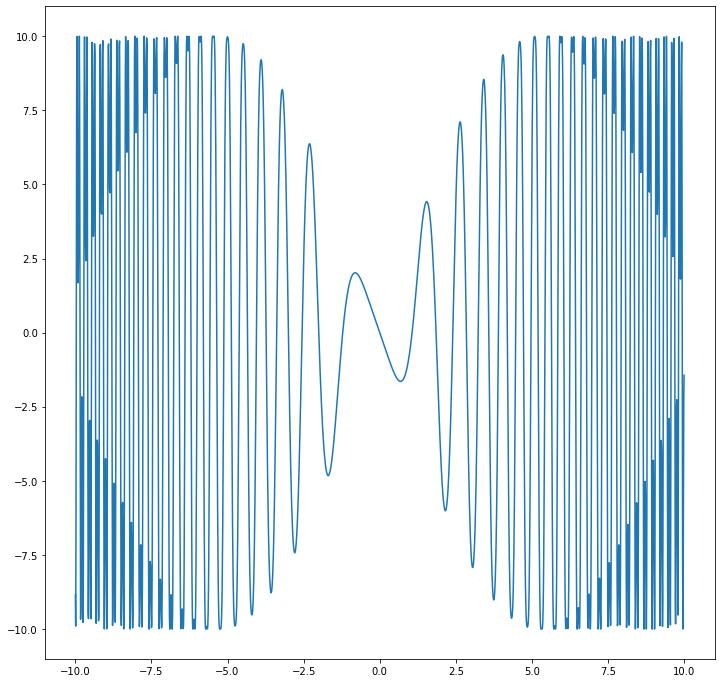

In [17]:
plt.figure(figsize=(12,12))
x = np.linspace(-10,10,2000)
plt.plot(x,f(x))
plt.show()

In [21]:
def un_pas(x):
    # On fait un pas suivant la loi uniforme dans un petit voisinage de la position actuelle x
    # Et on rejette tout déplacement au delà de l'invervalle [-10,10] ici.
    delta = 0.5 # dépend du bon sens
    while True : 
        pas = rand() * delta * 2 - delta # Uniforme dans [-delta,delta]
        if -10 <= x+pas <= 10 :
            return x + pas

In [28]:
# test 
un_pas(0)

-0.31855643571474845

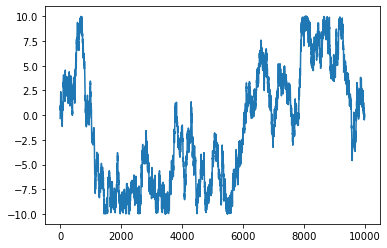

In [46]:
# Première étape: marche aléatoire simple
# Visualiser une trajectoire
pos_actuelle = 0
trajectoire = []
for _ in range(10000):
    pos_actuelle = un_pas(pos_actuelle)
    trajectoire.append(pos_actuelle)
plt.plot(trajectoire)
plt.show()


On observe bien des oscilliations entre -10 et 10 la marche explore tout l'espace

## Recuit simulé

basé sur cette marche aléatoire. On va utiliser un schéma de température différent de l'exo 1 (voyageur de commerce).
On va prendre $T_n = C \times (1-\epsilon)^n$, par exemple  $T_n = C\times 0.995^n$

On pourra essayer aussi $T_n = C \times 1/\log(n)$.

In [191]:
T = 10 # à ajuster
x_act = 0 # On peut commencer nimporte où
# Mais il faut s'assurer que la figure est **suffisament** grande pour permettre une exploration facile de l'espace
f_min = 0
elist = []
x_min = 0
max_iter = 1000 # à ajuster
for i in range(max_iter):
    x_neuf = un_pas(x_act) # On considère de faire un pas à partir de la position actuelle
    if f(x_neuf) < f(x_act):
        # On accepte un nouveau état si la valeur de la fonction est plus petite ( minimisation )
        x_act = x_neuf
    else:
        # ici la nouvelle posiion est moins bonne
        # cad f(x_act) <= f(x_neuf) 
        p_accept = np.exp( (f(x_act) - f(x_neuf) ) / T)
        if rand() < p_accept:
            # On accepte le nouvel état avec proba p_accept qui diminue dans le temps car T diminue
            x_act = x_neuf
        # Sinon on reste dans l'état
    # La vérification de minimum globale
    if f(x_act) < x_min:
        # Si c'est le meilleur etat jamais observé je le note comme le nouveau minimum à retenir
        x_min = x_act
        f_min = f(x_act)
    # Schéma de température (refroidissement)
    T = T * 0.995            
    # Dans tous les cas je note l'energie actuelle pour une visu
    elist.append(f(x_act))
        
         
    

In [192]:
print("la dernière position:", x_act)
print("la valeur minimale trouvé", f_min)
print("l'argument x de cette valeur", x_min)

la dernière position: 6.181688148542836
la valeur minimale trouvé -9.999665216020064
l'argument x de cette valeur 6.181688148542836


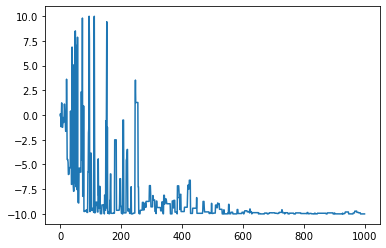

In [193]:
plt.plot(elist)
plt.show()